In [7]:
import pandas as pd
import ast
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from week 13 in YY's Data Vis Class
import spacy
import wordcloud
import en_core_web_sm
# nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')
from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


Import and process the data using Import_dev functions

In [3]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis

# elist = "D:/Box Sync/editorials/data/editorials-1.jl"
# tags = "D:/Box Sync/editorials/data/by_article_110219.jl"

elist_filename = "../data/editorials-1.jl"
tags_filename = "../data/by_article_110219.jl"
full_filename = "../data/by_article_fulltext_112919-2.jl"
test_full_filename = "../data/full_text.jl"

def init_df(filename, focus, test = False):
    raw = imp.import_jl(filename)
    out = imp.process(raw, focus = focus, out_form = "df")

    df = out
    df = imp.seq_dates(df, focus)
    if focus != "editorial":
        df = imp.id_columns(df)
    if test == True:
        print(df.head())
    return(df)

In [72]:
tag_df = init_df(tags_filename, "tags")
edi_df = init_df(elist_filename, "editorial")
full_df = init_df(full_filename, "full")

edi_df.head()

headline  \
6139                     how to write a winning résumé   
6135         the commandments of cover letter creation   
6134          his mother cried when he went into sales   
6133        what are headhunters and how do they work?   
6132  dressing scientists for success: male case study   

                                                                                                  preview          authors       date  date_seq  \
6139                                    our columnist explains all you need to know about resumes and cvs      peter fiske 1996-10-18        18   
6135  writing a good cover letter boils down to making a decent presentation of your experience with t...      peter fiske 1996-12-20        81   
6134  how one man's career change helped him keep his self-respect, make a few bucks, and have a blast...  david g. jensen 1997-05-09       221   
6133                   do you know how the headhunting process works and how it might affect you someday?  david g. jensen 1997-09-12       347   
6132  scientists may find shopping for business attire perplexing at first, but this is easily overcom...      peter fiske 1997-09-26       361   

      month_seq  year  
6139         10  1996  
6135         12  1996  
6134         17  1997  
6133         21  1997  
6132         21  1997

In [4]:
#plt.hist(editorial["date"], bins = 25, color = "blue")
#plt.hist(tags["date"], bins = 25, color = "red")

In [5]:
#plt.hist(tags["date"], bins = 25)

In [6]:
tag_df.head()

headline  \
0                               how to write a winning résumé   
1                   the commandments of cover letter creation   
2            dressing scientists for success: male case study   
3                     the tooling up book club: on the market   
4  self-assessment exercises: a gre for your ego and superego   

                                                                                                  tags      authors       date     time  date_seq  \
0                          [tooling up, advice, graduate, academic, industry, americas, united states]  peter fiske 1996-10-18  8:00 am        18   
1                                                                       [tooling up, advice, americas]  peter fiske 1996-12-20  0:00 am        81   
2                                [tooling up, advice, graduate, postdoc, academic, industry, americas]  peter fiske 1997-09-26  8:00 am       361   
3                                          [tooling up, advice, graduate, postdoc, academic, americas]  peter fiske 1998-01-30  0:00 am       487   
4  [tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...  peter fiske 1998-02-27  0:00 am       515   

   month_seq  year  n_posts_author column1 column2  
0         10  1996              59      no     yes  
1         12  1996              59      no     yes  
2         21  1997              59      no     yes  
3         25  1998              59      no     yes  
4         26  1998              59      no     yes

In [7]:
full_df.head()

headline  \
0                               how to write a winning résumé   
1                   the commandments of cover letter creation   
2            dressing scientists for success: male case study   
3                     the tooling up book club: on the market   
4  self-assessment exercises: a gre for your ego and superego   

                                                                                                  tags      authors       date     time  \
0                          [tooling up, advice, graduate, academic, industry, americas, united states]  peter fiske 1996-10-18  8:00 am   
1                                                                       [tooling up, advice, americas]  peter fiske 1996-12-20  0:00 am   
2                                [tooling up, advice, graduate, postdoc, academic, industry, americas]  peter fiske 1997-09-26  8:00 am   
3                                          [tooling up, advice, graduate, postdoc, academic, americas]  peter fiske 1998-01-30  0:00 am   
4  [tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...  peter fiske 1998-02-27  0:00 am   

                                                                                                  text  \
0    by  welcome to "tooling up," a monthly column about job hunting and career development for sci...   
1    by   've always hated the term "cover letter." it implies that the letter you send out to acco...   
2    by   e all know that, with respect to fashion, the world holds a rather dim view of scientists...   
3    by   ow that the holiday season is over, you have returned to your regular life, in the lab, i...   
4    by   --miguel de cervantes any young scientists who explore nontraditional careers are seeking...   

                                                                                                   bio  date_seq  month_seq  year  n_posts_author  \
0  [peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...        18         10  1996              59   
1  [peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...        81         12  1996              59   
2  [peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...       361         21  1997              59   
3  [peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...       487         25  1998              59   
4  [peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...       515         26  1998              59   

  column1 column2  
0      no     yes  
1      no     yes  
2      no     yes  
3      no     yes  
4      no     yes

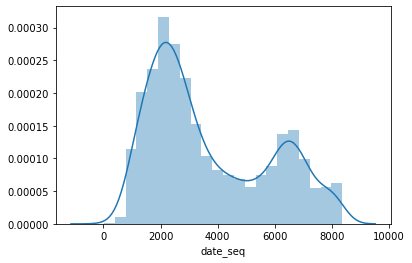

In [8]:
sns.distplot(edi_df["date_seq"])
#sns.distplot(tags["date_seq"])

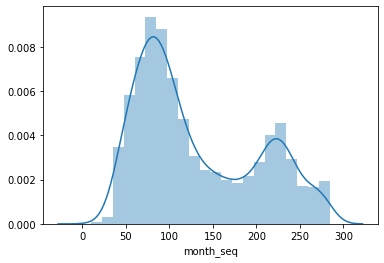

In [9]:
# Not necessary, Just done to make sure I was getting about the same results with Month
sns.distplot(edi_df["month_seq"])

In [10]:

#tags_month = tags.set_index("date").resample('M')["n"].sum()
#editorial_month = editorial.set_index("date").resample('M')["n"].sum()
#editorial_month_df = pd.DataFrame(editorial_month)

#editorial_month_df["date"] = editorial_month_df.index
#editorial_month_df

#sns.lineplot(x = "date", y = "n", data = editorial_month_df)

In [13]:
### This code is defunct now ###
# but I'm keeping it as a safety in case something goes wrong with the new function that does this

"""
# I don't like the line plot, because it's too jagged, but the line plot actually interprest month_seq as numbers
editorial_month_seq = editorial.groupby("month_seq").sum()
#editorial_month_seq.head(30)
editorial_month_seq["month_seq"] = editorial_month_seq.index
#editorial_month_seq = pd.DataFrame(editorial_month_seq)

tags_month_seq = tags.groupby("month_seq").sum()
#editorial_month_seq.head(30)
tags_month_seq["month_seq"] = tags_month_seq.index
#editorial_month_seq = pd.DataFrame(editorial_month_seq)

# lol, I just realized that I really need to make these into functions.... 

# for editorials
y_seq = []
for n_months in editorial_month_seq["month_seq"]:
    for months in cumulative_months:
        if n_months < months:
            year = cumulative_months.index(months)
            y_seq.append(year + 1996)
            break
editorial_month_seq["year"] = y_seq
editorial_month_seq.head()

# for tags
y_seq = []
for n_months in tags_month_seq["month_seq"]:
    for months in cumulative_months:
        if n_months < months:
            year = cumulative_months.index(months)
            y_seq.append(year + 1996)
            break
tags_month_seq["year"] = y_seq
tags_month_seq.head()

#editorial_month_seq.head()
sns.lineplot(x = "month_seq", y = "n", color = "red", data = tags_month_seq)
sns.lineplot(x = "month_seq", y = "n", color = "blue", data = editorial_month_seq)

"""

'\n# I don\'t like the line plot, because it\'s too jagged, but the line plot actually interprest month_seq as numbers\neditorial_month_seq = editorial.groupby("month_seq").sum()\n#editorial_month_seq.head(30)\neditorial_month_seq["month_seq"] = editorial_month_seq.index\n#editorial_month_seq = pd.DataFrame(editorial_month_seq)\n\ntags_month_seq = tags.groupby("month_seq").sum()\n#editorial_month_seq.head(30)\ntags_month_seq["month_seq"] = tags_month_seq.index\n#editorial_month_seq = pd.DataFrame(editorial_month_seq)\n\n# lol, I just realized that I really need to make these into functions.... \n\n# for editorials\ny_seq = []\nfor n_months in editorial_month_seq["month_seq"]:\n    for months in cumulative_months:\n        if n_months < months:\n            year = cumulative_months.index(months)\n            y_seq.append(year + 1996)\n            break\neditorial_month_seq["year"] = y_seq\neditorial_month_seq.head()\n\n# for tags\ny_seq = []\nfor n_months in tags_month_seq["month_seq"]:

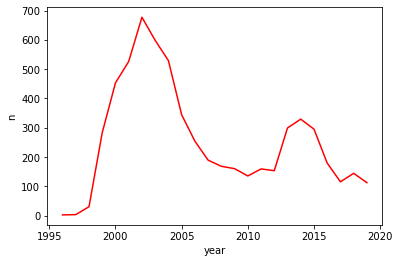

In [50]:
tag_vis = vis.prep_per(tag_df, group_by = "year", color = "red", test = False)

sns.lineplot(x = "year", y = "n", color = "red", data = tag_vis) 

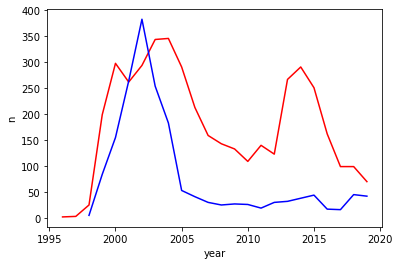

In [16]:
column = vis.dual_per(tag_df, split = "column2", group_by = "avg_month", test = False)

column1 = column[0][0]
column2 = column[1][0]

column_df0 = vis.prep_per(column1, group_by = "year", color = "red", test = False)
column_df1 = vis.prep_per(column2, group_by = "year", color = "blue", test = False)

sns.lineplot(x = "year", y = "n", color = "red", data = column_df0) 
sns.lineplot(x = "year", y = "n", color = "blue", data = column_df1) 
    

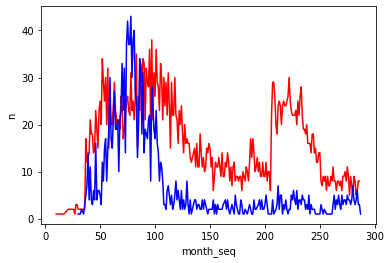

In [20]:
column = vis.dual_per(tag_df, split = "column2", group_by = "month", test = False)

column1 = column[0][0]
column2 = column[1][0]

column_df0 = vis.prep_per(column1, group_by = "month", color = "red", test = False)
column_df1 = vis.prep_per(column2, group_by = "month", color = "blue", test = False)

sns.lineplot(x = "month_seq", y = "n", color = "red", data = column_df0) 
sns.lineplot(x = "month_seq", y = "n", color = "blue", data = column_df1) 

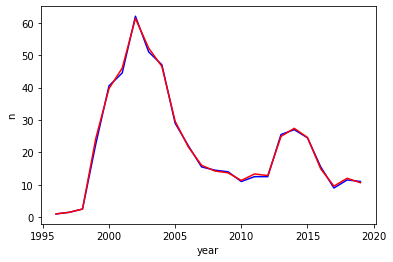

In [30]:
# median monthly publication each year
# This one is connsiderably smoother

editorial_year_med = editorial_month_seq.groupby("year").median()
editorial_year_med["year"] = editorial_year_med.index

#editorial_year.head(10)

sns.lineplot(x = "year", y = "n", color = "blue", data = editorial_year_med)
sns.lineplot(x = "year", y = "n", color = "red", data = editorial_year)

# okay, they're different enough for me to know that I'm getting different measurements here
# but not so different that mean and median actually matter

Descriptive stats on Authors

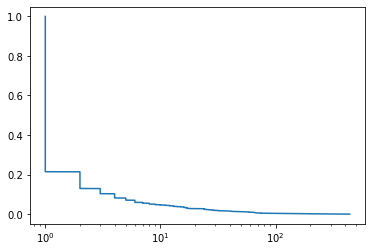

In [31]:
# articles per author

authors = tags["authors"].value_counts()
authors_df = pd.DataFrame(authors)
authors_df.head(10)

# total number of authors 
#print(len(authors_df))

# CCDF of the authors by the number of articles they wrote
# like, 80% of the authors have only published once

#plt.yscale(value = "log")
plt.xscale(value = "log")
plt.plot(np.flip(np.sort(authors_df.authors)), np.linspace(0, 1, len(authors_df.authors), endpoint=False))

# good do another without all the under 5s
# find authors who've done more than once but less than 5--are they new columnists?

#authors_df[(authors > 1) & (authors < 5)]
# not helpful--not enough context

separate out the articles that are columns

In [33]:
#tags_column_month = tags_column.set_index("date").resample('M')["n"].sum()
##editorial_month = editorial.set_index("date").resample('M')["n"].sum()
#tags_column_month_df = pd.DataFrame(tags_column_month)

#tags_column_month_df["date"] = tags_column_month_df.index
#tags_column_month_df

#tags_notcolumn_month = tags_notcolumn.set_index("date").resample('M')["n"].sum()
##editorial_month = editorial.set_index("date").resample('M')["n"].sum()
#tags_notcolumn_month_df = pd.DataFrame(tags_notcolumn_month)

#tags_notcolumn_month_df["date"] = tags_notcolumn_month_df.index
#tags_notcolumn_month_df

#sns.barplot(x = "date", y = "n", data = tags_column_month_df, color = "blue")
#sns.barplot(x = "date", y = "n", data = tags_notcolumn_month_df, color = "red")

# bad doesn't catch columns that are not labelled as such the blue is lost?

In [22]:
#tags[(tags["n_posts_author"] > 4) & (tags["n_posts_author"] < 6)]
print(len(tag_df[(tag_df["n_posts_author"] < 3) & (tag_df["column2"] == "no")]))
print(len(tag_df[(tag_df["n_posts_author"] == 1) & (tag_df["column2"] == "no")]))
#tags[(tags["column"] == "yes")]

# I don't know, I'm on the fence about including authors of 2 posts in  the one-post set.
# but I think the 2 posts crew have enough false positives that I'd rather start out with just 1
# at least until I have a better way of separating out the false positives
#tags[(tags["n_posts_author"] == 2) & (tags["column"] == "no")]

# "column" only becomes a tag after 2014, even then, only David G. Gensen uses it for a while"
# the only false positive I'm seeing for the 5 or more rule is  Viviane Callier, 
# every other incidence of 5 or more authorships is before 2014

1551
1265


In [28]:
#tags["column2"] = 1

# column 2 is for articles that are likely to have columns   
# What I'll do later for Authors who have only published once or twice



# how many more likely columns am I catching?
print(len(tag_df[(tag_df["column1"]== "no") & (tag_df["column2"] == "yes")]))

# tag_df.head(30)
print(tag_df["column2"].value_counts())
print(tag_df["column1"].value_counts())

4114
yes    4323
no     1813
Name: column2, dtype: int64
no     5927
yes     209
Name: column1, dtype: int64


In [29]:
tags_column = tag_df[tag_df.column2 == "yes"]
tags_notcolumn = tag_df[tag_df.column2 == "no"]

tags_notcolumn.head()
# no more distplots for this
#sns.distplot(tags_column["date_seq"], color = "blue")
#sns.distplot(tags_notcolumn["date_seq"], color = "red")


# Numbers of authors who are and are not columnists
print(len(tags_column["authors"].value_counts()))
print(len(tags_notcolumn["authors"].value_counts()))

239
1492


In [30]:
# Use code for month_seq instead of these dates

# tags_column_month = tags_authors_column.set_index("date").resample('M')["n"].sum()
# #editorial_month = editorial.set_index("date").resample('M')["n"].sum()
# tags_column_month_df = pd.DataFrame(tags_authors_column_month)

# tags_authors_column_month_df["date"] = tags_authors_column_month_df.index
# tags_authors_column_month_df

# tags_authors_notcolumn_month = tags_authors_notcolumn.set_index("date").resample('M')["n"].sum()
# #editorial_month = editorial.set_index("date").resample('M')["n"].sum()
# tags_authors_notcolumn_month_df = pd.DataFrame(tags_authors_notcolumn_month)

# tags_authors_notcolumn_month_df["date"] = tags_authors_notcolumn_month_df.index
# tags_authors_notcolumn_month_df
# ################

# And the month_seq code:

"""

# for columns 
tags_column_month_seq = tags_column.groupby("month_seq").sum()
#editorial_month_seq.head(30)
tags_column_month_seq["month_seq"] = tags_column_month_seq.index
#editorial_month_seq = pd.DataFrame(editorial_month_seq)

y_seq = []
for n_months in tags_column_month_seq["month_seq"]:
    for months in cumulative_months:
        if n_months < months:
            year = cumulative_months.index(months)
            y_seq.append(year + 1996)
            break
tags_column_month_seq["year"] = y_seq
tags_column_month_seq.head()

# for notcolumn 
tags_notcolumn_month_seq = tags_notcolumn.groupby("month_seq").sum()
#editorial_month_seq.head(30)
tags_notcolumn_month_seq["month_seq"] = tags_notcolumn_month_seq.index
#editorial_month_seq = pd.DataFrame(editorial_month_seq)

y_seq = []
for n_months in tags_notcolumn_month_seq["month_seq"]:
    for months in cumulative_months:
        if n_months < months:
            year = cumulative_months.index(months)
            y_seq.append(year + 1996)
            break
tags_notcolumn_month_seq["year"] = y_seq
tags_notcolumn_month_seq.head()


sns.lineplot(x = "month_seq", y = "n", data = tags_column_month_seq, color = "blue")
sns.lineplot(x = "month_seq", y = "n", data = tags_notcolumn_month_seq, color = "red")
# maybe good? why is it Soooo different than the last bar graph? compare the underlying graphs`
# maybe bargraph by year--these month ones are overwhelming
# fix the dates row so that it's more readable
"""

'\n\n# for columns \ntags_column_month_seq = tags_column.groupby("month_seq").sum()\n#editorial_month_seq.head(30)\ntags_column_month_seq["month_seq"] = tags_column_month_seq.index\n#editorial_month_seq = pd.DataFrame(editorial_month_seq)\n\ny_seq = []\nfor n_months in tags_column_month_seq["month_seq"]:\n    for months in cumulative_months:\n        if n_months < months:\n            year = cumulative_months.index(months)\n            y_seq.append(year + 1996)\n            break\ntags_column_month_seq["year"] = y_seq\ntags_column_month_seq.head()\n\n# for notcolumn \ntags_notcolumn_month_seq = tags_notcolumn.groupby("month_seq").sum()\n#editorial_month_seq.head(30)\ntags_notcolumn_month_seq["month_seq"] = tags_notcolumn_month_seq.index\n#editorial_month_seq = pd.DataFrame(editorial_month_seq)\n\ny_seq = []\nfor n_months in tags_notcolumn_month_seq["month_seq"]:\n    for months in cumulative_months:\n        if n_months < months:\n            year = cumulative_months.index(months)\n   

# One-time author stuff

1265


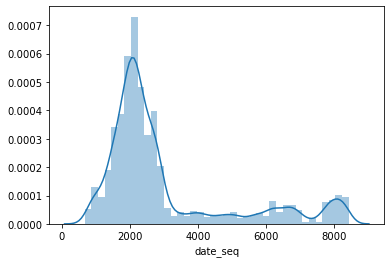

In [65]:
tag_df["working"] = ["yes" if "working life" in x else "no" for x in tag_df["tags"]]
# print(tag_df[(tag_df["working"] == "yes")])
tag_df.head()

onetime_authors = tag_df[(tag_df["n_posts_author"] == 1) & (tag_df["column2"] == "no")]
onetime_authors.head(30)

print(len(onetime_authors))

sns.distplot(onetime_authors["date_seq"])

In [53]:
onetime_authors_month_seq.head()

year  date_seq  month_seq  n_posts_author
0  1998      2879        133               4
1  1999     57146       2439              58
2  2000    136967       5446              97
3  2001    322364      12363             184
4  2002    620603      23237             297

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


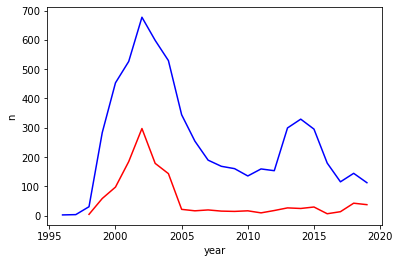

In [55]:
# And the month_seq code:
onetime_authors["n"] = 1

# for columns 
onetime_authors_month_seq = onetime_authors.groupby("year").sum()
#editorial_month_seq.head(30)
onetime_authors_month_seq = onetime_authors_month_seq.reset_index()
#editorial_month_seq = pd.DataFrame(editorial_month_seq)

#y_seq = []
#for n_months in onetime_authors_month_seq["month_seq"]:
#    for months in cumulative_months:
#        if n_months < months:
#            year = cumulative_months.index(months)
#            y_seq.append(year + 1996)
#            break
#onetime_authors_month_seq["year"] = y_seq

# onetime_authors_month_seq = imp.seq_dates(onetime_authors_month_seq, focus = "tags")

onetime_authors_month_seq.head()

sns.lineplot(x = "year", y = "n", color = "blue", data = tag_vis) 
sns.lineplot(x = "year", y = "n", data = onetime_authors_month_seq, color = "red")

Is Working Life typically one time authors

In [67]:
print(len(tag_df[(tag_df["working"] == "yes")]))
print(len(onetime_tags[(onetime_tags["working"] == "yes")]))

# Yes, most of the time

tag_df[(tag_df["working"] == "yes")& (tag_df["date_seq"] < 6648)]
#tag_df.head()

# I think it started at the end of 2014??

# No, by looking through the Science Mag archives, Working life was in the magazine earlier than that
# but it was spotty--was not included in Every magazine
# and the reason earlier articles aren't in this dataset is because not all of these articles have been linked 
# under the careers section of the website--only in the journal-proper archive

138
0


headline                                                                                                 tags  \
5824  making science a desirable career  [working life, issues and perspectives, job market, early career, postdoc, academic, united states]   

                                      authors       date     time  date_seq  month_seq  year  n_posts_author column1 column2 working  n  
5824  jessica k. polka, kristin a. krukenberg 2014-12-12  1:00 am      6647        228  2014               1      no      no     yes  1

# Tags Work

match tags to columns
* make a series of counters for each tag
* for each tag, keep track of how many authors use it
* If only one author uses a tag repeatedly--very likely it's a column tag
* If multiple authors use a tag only once--very likely it's NOT a column tag
* make some way to evaluate this such that the greater the proportion of uses have been from only one author, the more likely it is for the tag to be added to the list of column tags
* tags only used once or twice are not likely to be column tags

get incidence of tags marked by date. So, do the dataframe so that the multiple tags will be spread out to different rows, with the rest of the columns intact

In [73]:
# First task, get incidences
# begin with separating the tags to appear in their own rows...
# I should probably do something similar with authors:/

tag_df = tgs.seperate_tags(tag_df)

print(len(tag_df))
tag_df.head()

23104


headline      authors       date     time  date_seq  month_seq  year  n_posts_author column1  \
0                               how to write a winning résumé  peter fiske 1996-10-18  8:00 am        18         10  1996              59      no   
1                   the commandments of cover letter creation  peter fiske 1996-12-20  0:00 am        81         12  1996              59      no   
2            dressing scientists for success: male case study  peter fiske 1997-09-26  8:00 am       361         21  1997              59      no   
3                     the tooling up book club: on the market  peter fiske 1998-01-30  0:00 am       487         25  1998              59      no   
4  self-assessment exercises: a gre for your ego and superego  peter fiske 1998-02-27  0:00 am       515         26  1998              59      no   

  column2 variable         tag  
0     yes        0  tooling up  
1     yes        0  tooling up  
2     yes        0  tooling up  
3     yes        0  tooling up  
4     yes        0  tooling up

In [75]:

inc_dict = tgs.tag_incidence(tag_df, lifespan = True, id_col_tag = True, binary = True)

#print(inc_dict["working life"]["overall"])

col_tag_todf = {}

for i in tag_df.index.values:
    w_tag = tag_df.loc[i, "tag"]
    col_tag_todf[w_tag] = inc_dict[w_tag]["overall"]["col_tag"]

tag_df["col_tag"] = tag_df["tag"].map(col_tag_todf) 

tag_df.tail()

headline            authors       date     time  date_seq  month_seq  year  n_posts_author column1 column2  \
189977      getting credit for peer review  sandeep ravindran 2016-02-08  3:15 pm      7070        242  2016               1      no      no   
196112  want a letter? you write it for me       roger s. day 2016-01-07  2:30 pm      7038        241  2016               1     yes     yes   
196113      getting credit for peer review  sandeep ravindran 2016-02-08  3:15 pm      7070        242  2016               1      no      no   
202248  want a letter? you write it for me       roger s. day 2016-01-07  2:30 pm      7038        241  2016               1     yes     yes   
208384  want a letter? you write it for me       roger s. day 2016-01-07  2:30 pm      7038        241  2016               1     yes     yes   

       variable            tag col_tag  
189977       30          india      no  
196112       31       oncology      no  
196113       31  united states      no  
202248       32   other fields      no  
208384       33       americas      no

In [108]:
# tags incidence dataframe
tag_inc_df = {"year":[],"tag":[],"incidence":[]}
tag_inc_counting = {}
# tag_inc_counting = {tag: {year:int, year: int, year: int}}

# count incidences of each tag per year
for key in [key for key in inc_dict.keys()]:
    # print(key)
    if inc_dict[key]["overall"]["col_tag"] == "no": # filter out tags that are probs identifying columns
        if key in tag_inc_counting.keys():
            for post in inc_dict[key]["overall"]["span"]:
                w_year = imp.cumul_to(post[1], "m")
                print(w_year)
                if w_year in tag_inc_counting[key].keys():
                    print("add2")
                    tag_inc_counting[key][w_year] += 1
                else:
                    tag_inc_counting[key][w_year] = 1
                    print(tag_inc_counting[key])
        else:
            tag_inc_counting[key] = {}
            for post in inc_dict[key]["overall"]["span"]:
                w_year = imp.cumul_to(post[1], "m")
                #print(w_year)
                if w_year in tag_inc_counting[key].keys():
                    #print("add1")
                    tag_inc_counting[key][w_year] += 1
                else:
                    tag_inc_counting[key][w_year] = 1
                    #print(tag_inc_counting[key])

# convert counting dictionary to dictionary that can be made into a df
for key in tag_inc_counting.keys():
    for year in tag_inc_counting[key].keys():
        tag_inc_df["year"].append(year)
        tag_inc_df["tag"].append(key)
        tag_inc_df["incidence"].append(tag_inc_counting[key][year])

tag_inc_df = pd.DataFrame(tag_inc_df)
print(len(tag_inc_df))
tag_inc_df.tail()

1001


year                  tag  incidence
996   2016   structural biology          1
997   2016           toxicology          1
998   2016  veterinary medicine          1
999   2016             virology          1
1000  2016           biophysics          1

In [104]:
# total tags
print(len(inc_dict))

#tags without columns
print(len([key for key in inc_dict.keys() if inc_dict[key]["overall"]["col_tag"] == "no"]))

# average tags per post
print(np.average(tag_df.groupby(by = "headline").size()))

409
365
3.7708503345846256


In [109]:
for i in range(1996,2019):
    print(tag_inc_df[tag_inc_df["year"]== i].sort_values(by = ["incidence"]))

     year            tag  incidence
203  1996       graduate          1
231  1996       academic          1
432  1996  united states          1
588  1996       industry          1
44   1996         advice          2
245  1996       americas          2
     year         tag  incidence
234  1997    academic          1
649  1997   midcareer          1
692  1997  biomedical          2
45   1997      advice          3
204  1997    graduate          3
253  1997    americas          3
299  1997     postdoc          3
590  1997    industry          3
     year                      tag  incidence
965  1998             biochemistry          1
54   1998               job market          1
68   1998                   column          1
82   1998                 myscinet          1
116  1998      workplace diversity          1
405  1998                  biology          1
742  1998                    other          2
693  1998               biomedical          3
650  1998                midcareer   

239  2006                 americas        187
     year                      tag  incidence
929  2007             other fields          1
148  2007          career profiles          1
185  2007                forensics          1
433  2007            united states          1
700  2007              engineering          2
733  2007                    other          3
165  2007                 ctscinet          5
594  2007            undergraduate          6
653  2007          social sciences          7
686  2007               biomedical          8
619  2007        physical sciences          9
130  2007  life and career balance          9
545  2007               government         10
16   2007  issues and perspectives         13
637  2007                midcareer         16
88   2007                 myscinet         18
194  2007                 graduate         20
292  2007                  postdoc         23
719  2007            life sciences         24
573  2007                 industry

14   2012   issues and perspectives         84
     year                        tag  incidence
500  2013                       csci          1
441  2013                    twitter          1
443  2013         person of the year          1
465  2013                mathematics          1
952  2013                negotiation          1
504  2013              impact factor          1
508  2013             science policy          1
538  2013                     lindau          1
676  2013           non-disciplinary          1
748  2013   scientific communication          1
749  2013                 leadership          1
751  2013                application          1
752  2013           financial crisis          1
800  2013                 internship          1
438  2013                  mentoring          1
803  2013                   training          1
814  2013             united nations          1
829  2013        transferable skills          1
838  2013                     hiring     

219  2014                         academic        224
     year                        tag  incidence
380  2015                  erc grant          1
382  2015                    writing          1
384  2015                      ph.d.          1
385  2015                   conflict          1
386  2015  european research council          1
388  2015     translational research          1
390  2015      scientific publishing          1
811  2015               social media          1
677  2015           non-disciplinary          1
416  2015                     sacnas          1
418  2015                     cancer          1
535  2015                 humanities          1
797  2015                 fellowship          1
442  2015                    twitter          1
449  2015                   activism          1
519  2015                       race          1
450  2015                        fda          1
453  2015                blog. union          1
454  2015          academic poachi

670   2016               non-disciplinary         84
     year                          tag  incidence
18   2017      issues and perspectives          1
570  2017                         data          1
569  2017                          gre          1
567  2017              graduate school          1
566  2017  survey of earned doctorates          1
498  2017                    in person          1
477  2017           taken for granted           1
410  2017                   disability          1
317  2017                   career q&a          1
279  2017                       europe          1
256  2017                     americas          1
858  2017                  late career          1
200  2017                     graduate          1
81   2017                  tooling up           1
79   2017         scientific community          1
738  2017                        other          2
582  2017                     industry          2
662  2017              social sciences         

# Word Salad

Just look at all the words

In [29]:
#editorial_dict_backup

# might not be a perfect solution for sorting out plurals, but it's a start
import inflect
p = inflect.engine()

# editorial_dict = editorial_dict_backup
raw = imp.import_jl(elist_filename)
editorial_dict = imp.process(raw, focus = "editorial", out_form = "dict")
all_headlines = editorial_dict["headline"]

words_list = []
full_headline_str = ""
first_person = []

for line in all_headlines:
    words_list += line.split(" ")
    line2 = ""
    for word in line:
        line2 += word.lower()
    full_headline_str += line2
    #print(line.split(" "))
    
#print(words_list)
#print(full_headline_str)
#headline_str

In [31]:
doc_headlines = nlp(full_headline_str)

full_headline_str2 = ""

for token in doc_headlines:
    #print(token.text)
    #print(token.pos)
    if token.pos == 92:
        #print("!!!!!!!",token)
        word = str(token)
        #if word == "scientists"
        if p.singular_noun(word) == False:
            word = str(token)
            #print(word)
        else:
            word = p.singular_noun(word)
        #print(word)
    else:
        word = str(token)
    full_headline_str2 += " "+ str(word)
    
doc_headlines = nlp(full_headline_str2)
    
words = [token.text for token in doc_headlines
         if token.is_stop != True and token.is_punct != True]

#Counter(words).most_common(5)

word_cnt = Counter(words)

In [16]:
"""

wc = wordcloud.WordCloud(width=1000, height=500)
wc.generate_from_frequencies(word_cnt)

plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

"""

'\n\nwc = wordcloud.WordCloud(width=1000, height=500)\nwc.generate_from_frequencies(word_cnt)\n\nplt.figure(figsize=(20,10))\nplt.imshow(wc, interpolation="bilinear")\nplt.axis("off")\n\n'

In [36]:
x = 0

for line in all_headlines:
    if "micella" in str(line):
        #pre = line[:line.index(":")]
        x +=1
        #print(line)
        #line = re.sub("Educated Woman[\:, -]+", "", line)
        #print(line)
        #print("-------")
        #if ":" in line:
        #    print(line[line.rfind(":")+2:])
        #elif "--" in line:
        #    print(line[line.index("--")+2:])
        #elif " - " in line:
        #    print(line[line.index(" - ")+3:])
        #elif "  " in line:
        #    print(line[line.index("  ")+3:])
        #else:
        #    print(line)
print(x)

53


In [43]:
# A common practice for columns is putting a column title in the title line--need to clean this from the titles themselves!
# many column names are separated from article title with a colon:
# assemble a dictionary of column titles to clean by gathering the pre-colon strings

#make exceptions for "educated woman" which is always that Micella's column and other obvious ones
def_columns = ["micella", "tooling", "chapter"]
out_words = ["science","career", "micella", "tooling", "chapter"]
pre_colon = {}
all_headlines_clean = []


for line in all_headlines:
    linenum = re.findall(r'\d+', line)
    if len(linenum) > 0:
        #print(line)
        #print(linenum)
        for num in linenum:
            line = line.replace(num, "")
            #line = line.replace(num, "num")
    if ":" in str(line):
        #print(line)
        pre = line[:line.rfind(":")]
        #print(line)
        #print(pre)
        if pre in pre_colon.keys():
            pre_colon[pre] += 1
        else:
            pre_colon[pre] = 1
    all_headlines_clean.append(line)

#print(all_headlines_clean[:40])
        
#for key in pre_colon:
#    if pre_colon[key] == 2:
#        print(key, pre_colon[key])
#import sys
clean = []
for line in all_headlines_clean:
    #print(line)
    flag = "N"
    for title_junk in def_columns:
        #if "Micella" in str(line):
        if title_junk in str(line):
            clean.append(line[line.rfind(":")+2:])
            #print("hi")
            #print(line)
            #print(line[line.rfind(":")+2:])
            flag = "Y"
            continue
    
    if flag == "Y":
        continue
    
    if ":" not in str(line):
        clean.append(line)
        #print(2)
    else:
        if pre_colon[line[:line.rfind(":")]] > 2:
            clean.append(line[line.rfind(": ")+2:])
            #print(3)
        else:
            clean.append(line)
            #print(4)
    #print(clean)
    #sys.exit()
all_headlines_clean = clean

#print(all_headlines_clean[:40])
#print(clean[:40])


In [61]:
def headline_clean(all_headlines):
    def_columns = ["micella", "tooling", "chapter"]
    pre_colon = {}
    all_headlines_clean = []


    for line in all_headlines:
        linenum = re.findall(r'\d+', line)
        if len(linenum) > 0:
            #print(line)
            #print(linenum)
            for num in linenum:
                line = line.replace(num, "")
                #line = line.replace(num, "num")
        if ":" in str(line):
            #print(line)
            pre = line[:line.rfind(":")]
            #print(line)
            #print(pre)
            if pre in pre_colon.keys():
                pre_colon[pre] += 1
            else:
                pre_colon[pre] = 1
        all_headlines_clean.append(line)

    #print(all_headlines_clean[:40])

    #for key in pre_colon:
    #    if pre_colon[key] == 2:
    #        print(key, pre_colon[key])
    #import sys
    clean = []
    for line in all_headlines_clean:
        #print(line)
        flag = "N"
        for title_junk in def_columns:
            #if "Micella" in str(line):
            if title_junk in str(line).lower():
                clean.append(line[line.rfind(":")+2:])
                #print("hi")
                #print(line)
                #print(line[line.rfind(":")+2:])
                flag = "Y"
                continue

        if flag == "Y":
            continue

        if ":" not in str(line):
            clean.append(line)
            #print(2)
        else:
            if pre_colon[line[:line.rfind(":")]] > 2:
                clean.append(line[line.rfind(": ")+2:])
                #print(3)
            else:
                clean.append(line)
                #print(4)
        #print(clean)
        #sys.exit()
    all_headlines_clean = clean
    return(all_headlines_clean)

    #print(all_headlines_clean[:40])
    #print(clean[:40])


redo wordcloud thing from before

In [40]:
words_list_full = []
full_headline_str = ""
first_person = []

count_micella = 0
count_postdoc = 0

for line in all_headlines_clean:
    words_list_full += line.split(" ")
    words_list_temp = line.split(" ")
    line2 = ""
    for word in words_list_temp:
        line2 += word.lower() + " "
        if word.lower() == "micella":
            count_micella +=1
        if word.lower() == "postdocs":
            count_postdoc +=1
    full_headline_str += line2
    
print(count_micella, count_postdoc)

22 78


In [14]:
doc_headlines = nlp(full_headline_str)

full_headline_str2 = ""

for token in doc_headlines:
    #print(token.text)
    #print(token.pos)
    if token.pos == 92:
        #print("!!!!!!!",token)
        word = str(token)
        #if word == "scientists"
        if p.singular_noun(word) == False:
            word = str(token)
            #print(word)
        else:
            word = p.singular_noun(word)
        #print(word)
    else:
        word = str(token)
    full_headline_str2 += " "+ str(word)
    
doc_headlines = nlp(full_headline_str2)
    
words = [token.text for token in doc_headlines
         if token.is_stop != True and token.is_punct != True]

#Counter(words).most_common(5)

word_cnt = Counter(words)

In [52]:
def pre_wordcloud(full_headline_str):
    doc_headlines = nlp(full_headline_str)

    full_headline_str2 = ""

    for token in doc_headlines:
        #print(token.text)
        #print(token.pos)
        if token.pos == 92:
            #print("!!!!!!!",token)
            word = str(token)
            #if word == "scientists"
            if p.singular_noun(word) == False:
                word = str(token)
                #print(word)
            else:
                word = p.singular_noun(word)
            #print(word)
        else:
            word = str(token)
        full_headline_str2 += " "+ str(word)

    doc_headlines = nlp(full_headline_str2)

    words = [token.text for token in doc_headlines
             if token.is_stop != True and token.is_punct != True]

    #Counter(words).most_common(5)

    word_cnt = Counter(words)
    return(word_cnt)

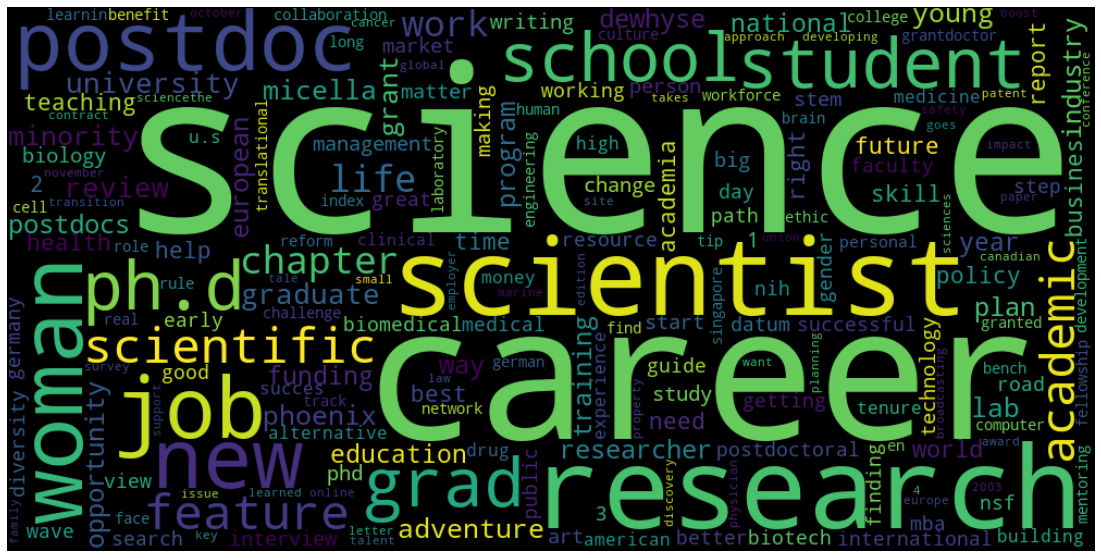

In [54]:
wc = wordcloud.WordCloud(width=1000, height=500)
wc.generate_from_frequencies(word_cnt)

plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

def wordcloud_graph(word_cnt):
    wc = wordcloud.WordCloud(width=1000, height=500)
    wc.generate_from_frequencies(word_cnt)

    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

# Facets

In [50]:
# editorial_dict = editorial_dict_backup

editorial_df2 = imp.process(raw, focus = "editorial", out_form = "df")
editorial_df2 = imp.seq_dates(editorial_df2, "editorial")
all_headlines = editorial_df2["headline"]

ranges = [2000,2005,2010,2015,2020]

pre2000 = editorial_df2[editorial_df2["year"] < 2000]
pre2005 = editorial_df2[(editorial_df2["year"] < 2005) & (editorial_df2["year"] >= 2000)]
pre2010 = editorial_df2[(editorial_df2["year"] < 2010) & (editorial_df2["year"] >= 2005)]
pre2015 = editorial_df2[(editorial_df2["year"] < 2015) & (editorial_df2["year"] >= 2010)]
pre2020 = editorial_df2[(editorial_df2["year"] > 2015)]

pre2000 = [headline for headline in pre2000["headline"] ]
pre2005 = [headline for headline in pre2005["headline"] ]
pre2010 = [headline for headline in pre2010["headline"] ]
pre2015 = [headline for headline in pre2015["headline"] ]
pre2020 = [headline for headline in pre2020["headline"] ]


first_person = []

def seperate_words(all_headlines):
    words_list = []
    full_headline_str = ""
    
    for line in all_headlines:
        words_list += line.split(" ")
        line2 = ""
        for word in line:
            line2 += word.lower()
        full_headline_str += line2
    #print(line.split(" "))
    return(full_headline_str)
    
#print(words_list)
#print(full_headline_str)
#headline_str

In [62]:
pre2000headlines = headline_clean(pre2000)
pre2005headlines = headline_clean(pre2005)
pre2010headlines = headline_clean(pre2010)
pre2015headlines = headline_clean(pre2015)
pre2020headlines = headline_clean(pre2020)

pre2000headlines = seperate_words(pre2000)
pre2005headlines = seperate_words(pre2005)
pre2010headlines = seperate_words(pre2010)
pre2015headlines = seperate_words(pre2015)
pre2020headlines = seperate_words(pre2020)

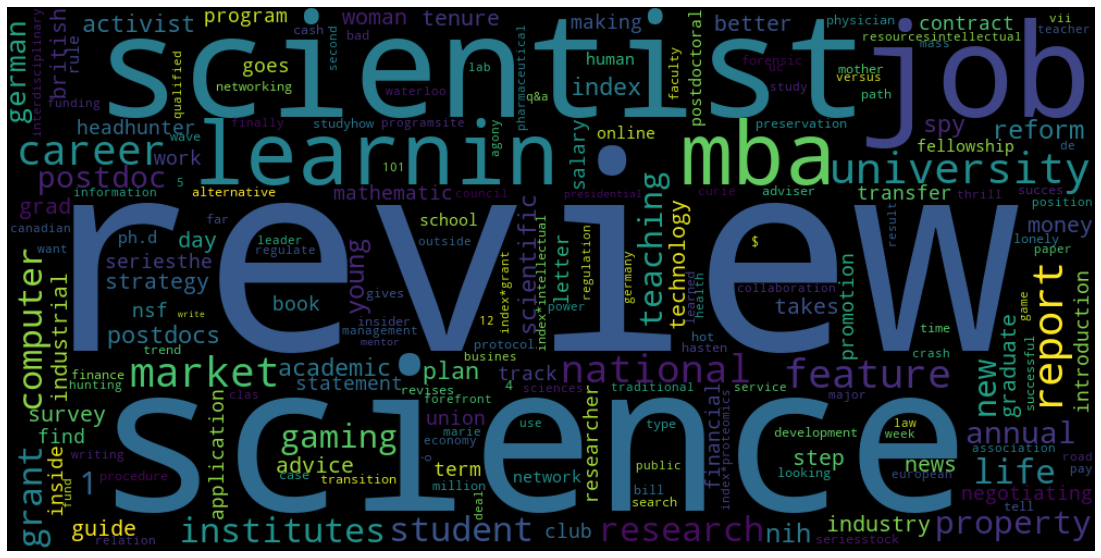

In [63]:
cloud_prep2000 = pre_wordcloud(pre2000headlines)

wordcloud_graph(cloud_prep2000)

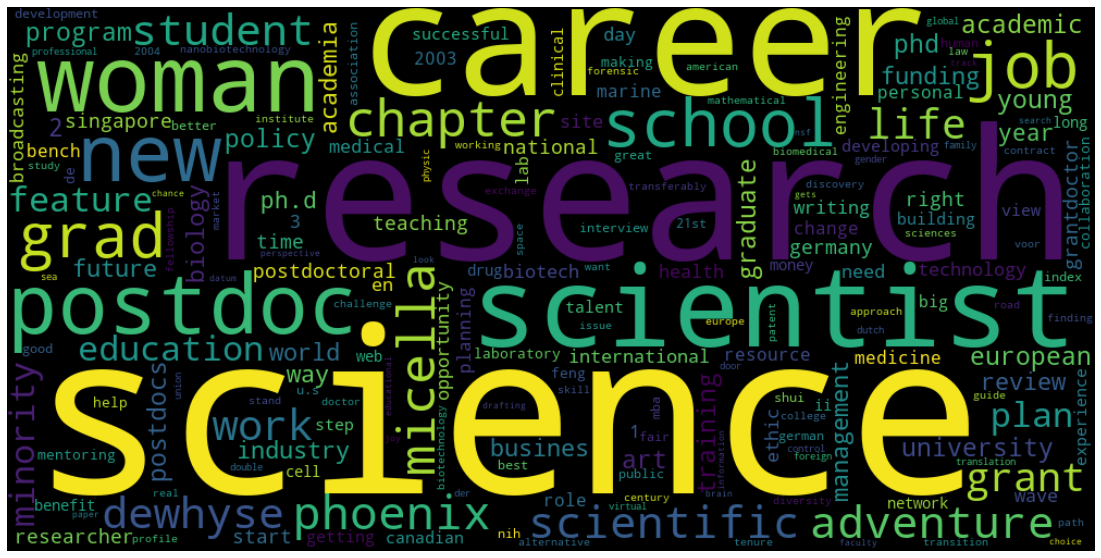

In [64]:
cloud_prep2005 = pre_wordcloud(pre2005headlines)

wordcloud_graph(cloud_prep2005)

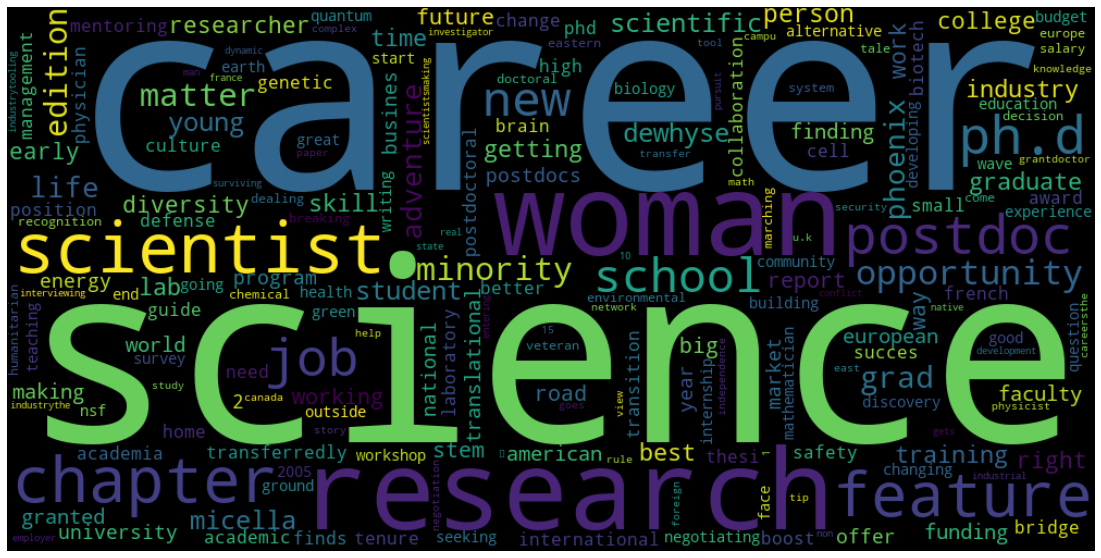

In [65]:
cloud_prep2010 = pre_wordcloud(pre2010headlines)

wordcloud_graph(cloud_prep2010)

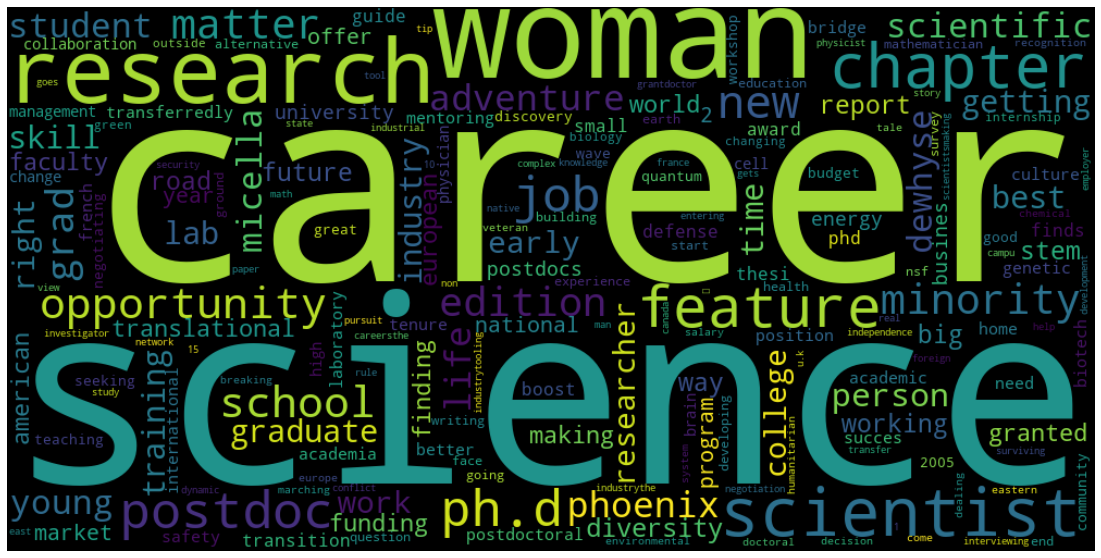

In [66]:
cloud_prep2010 = pre_wordcloud(pre2010headlines)

wordcloud_graph(cloud_prep2010)

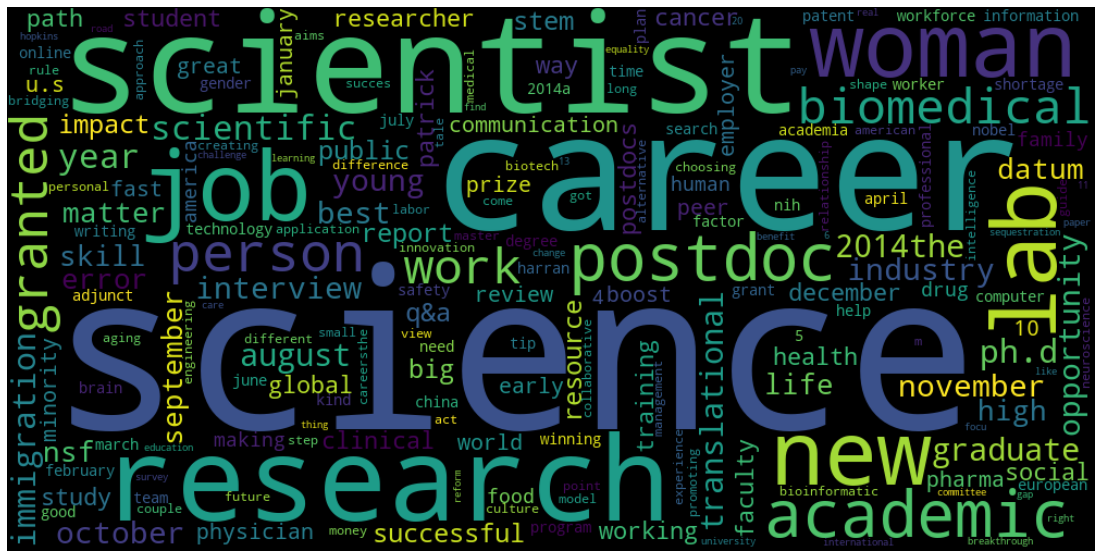

In [67]:
cloud_prep2015 = pre_wordcloud(pre2015headlines)

wordcloud_graph(cloud_prep2015)

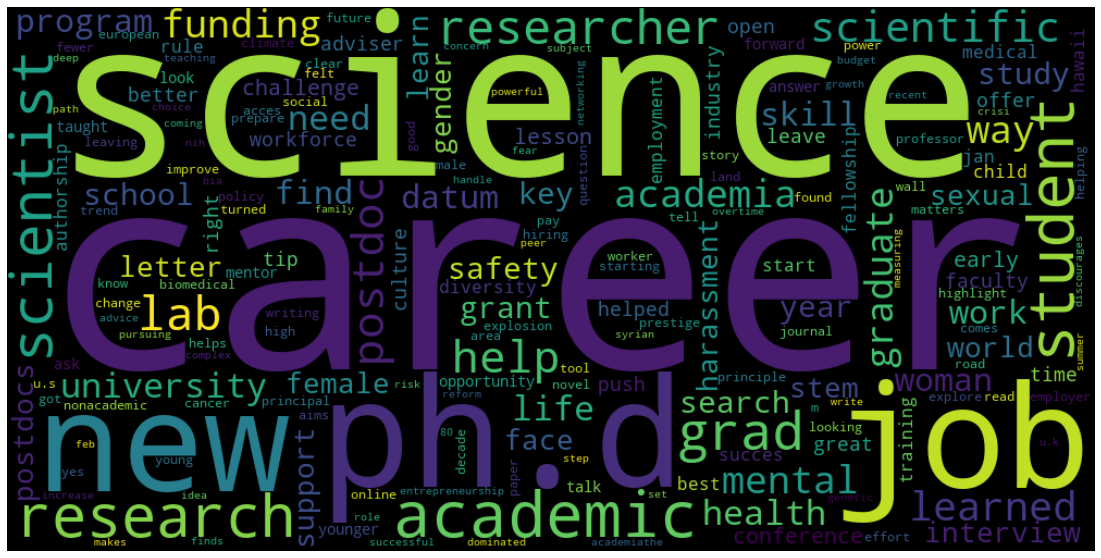

In [68]:
cloud_prep2020 = pre_wordcloud(pre2020headlines)

wordcloud_graph(cloud_prep2020)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


89
6047


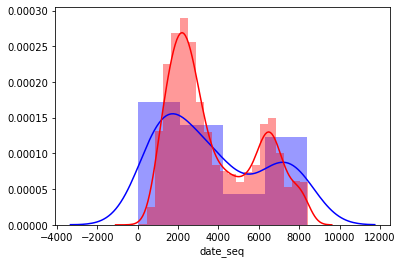

In [31]:
# personal pronouns exploratory count

first_pronouns = ["I", "me", "my", "mine", "myself" ]

editorial["personal"] = ["yes" if " I " in x else "no" for x in editorial["headline"]]
#tags.head()

editorial_first = tags[editorial.personal == "yes"]
editorial_notfirst = tags[editorial.personal == "no"]

print(len(editorial_first))
print(len(editorial_notfirst))

sns.distplot(editorial_first["date_seq"], color = "blue", norm_hist = False)
sns.distplot(editorial_notfirst["date_seq"], color = "red", norm_hist = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


41
6095


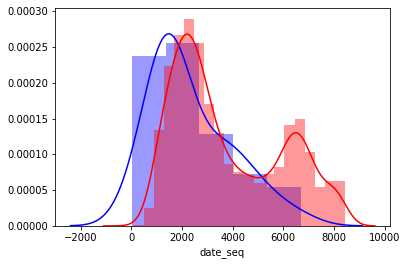

In [32]:
first_pronouns = ["I", "me", "my", "mine", "myself" ]

editorial["personal"] = ["yes" if " my " in x else "no" for x in editorial["headline"]]
#tags.head()

editorial_first = tags[editorial.personal == "yes"]
editorial_notfirst = tags[editorial.personal == "no"]

print(len(editorial_first))
print(len(editorial_notfirst))

sns.distplot(editorial_first["date_seq"], color = "blue")
sns.distplot(editorial_notfirst["date_seq"], color = "red")